In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [14]:
# GRADED FUNCTION: pool_forward

def PoolForward(Aprev, hyperparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, nH, nW, nC)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, nH, nW, nC)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve hyperparameters from "hparameters"
    stride = hyperparameters["stride"]
    f= hyperparameters['f']
    
    # Retrieve dimensions from the input shape
    (m, nH, nW, nC) = Aprev.shape#Input shape of the tensor
    
    # Define the dimensions of the output
    newNH = int((nH - f)/stride)+1#Output height of the tensor
    newNW = int((nH - f)/stride)+1#Output width of the tensor
    
    # Initialize output matrix A
    A = np.zeros((m,newNH, newNW, nC), dtype=np.int32)#Output tensor
    
    
    ### START CODE HERE ###
    for m1 in range(m):                                             # loop over the training examples
        for i,h1 in enumerate(range(0,nH,stride)):                  # loop on the vertical axis of the output volume
            for j,w1 in enumerate(range(0,nW,stride)):              # loop on the horizontal axis of the output volume
                for c1 in range(nC):                                # loop over the channels of the output volume
                    try:
                        if mode == "max":
                            A[m1,i,j,c1] = np.max(Aprev[m1,h1:h1+f,w1:w1+f,c1]) 
                        elif mode == "average":
                            A[m1,i,j,c1] = int(np.mean(Aprev[m1,h1:h1+f,w1:w1+f,c1]))
                    except:
                        break
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for BackPropagationPool()
    cache = (Aprev, hyperparameters, mode)# Parameters for back propagation
    
    return A, cache
    
    
    

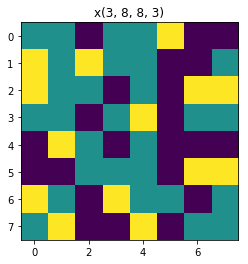

In [15]:
m = 1
nH = 8
nW = 8
nC = 1
poolSize = 2
stride = 2
hyperparameters ={"stride": stride, 'f':poolSize}
x = np.random.randint(0,3,(m,nH,nW,nC))


fig, ax1 = plt.subplots(1,1)
ax1.set_title("x{}".format(x.shape))
ax1.imshow(x[0,:,:,0])

x:
 [[1 1 0 1 1 2 0 0]
 [2 1 2 1 1 0 0 1]
 [2 1 1 0 1 0 2 2]
 [1 1 0 1 2 0 1 1]
 [0 2 1 0 1 0 0 0]
 [0 0 1 1 1 0 2 2]
 [2 1 0 2 1 1 0 1]
 [1 2 0 0 2 0 1 1]]
p:
 [[2 2 2 1]
 [2 1 2 2]
 [2 1 1 2]
 [2 2 2 1]]


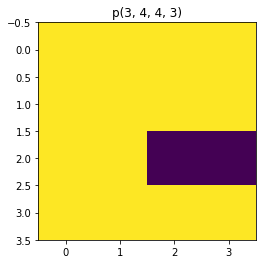

In [16]:
p,cache = PoolForward(x, hyperparameters)

print("x:\n",x[0,:,:,0])
print("p:\n",p[0,:,:,0])
fig, ax1 = plt.subplots(1,1)
ax1.set_title("p{}".format(p.shape))
ax1.imshow(p[1,:,:,1])